In [1]:
import numpy as np
import matplotlib.pyplot as plt
import edl
import constants as C
import plotting

%matplotlib widget

In [2]:
# import plotting

# conc_range = [1e-3, 10e-3, 100e-3, 1000e-3]
# fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(8,8), sharex=True)

# for i, conc in enumerate(conc_range):
#     potentials = np.linspace(-2, 0, 100)
#     aq = edl.Aqueous(conc, 8,8,8,8)
#     aq_sol = aq.potential_sweep(potentials)

#     adsorption = np.exp(-0.5*C.E_0*C.BETA * C.D_ADSORBATE_LAYER * aq_sol['efield'].values) * aq_sol['solvent'].values
#     adsorption_log = np.log10(adsorption) 
#     adsorption_tafel = np.gradient(potentials, adsorption_log)

#     transport = np.exp(-1.5 * C.E_0*C.BETA * aq_sol['phi2'].values)
#     transport_log = np.log10(transport)
#     transport_tafel = np.gradient(potentials, transport_log)

#     color = plotting.get_color_gradient(len(conc_range))[i]
#     ax[0,0].plot(aq_sol['phi0'], np.log10(adsorption), color=color,  label=conc)
#     ax[1,0].plot(aq_sol['phi0'], np.log10(transport), color=color)
#     ax[0,1].plot(aq_sol['phi0'], adsorption_tafel * 1e3, color=color)
#     ax[1,1].plot(aq_sol['phi0'], transport_tafel * 1e3, color=color)
#     ax[2,0].plot(aq_sol['phi0'], aq_sol['efield'] * 1e-9, color=color)
#     ax[2,1].plot(aq_sol['phi0'], aq_sol['phi2'], color=color)
#     ax[3,0].plot(aq_sol['phi0'], aq_sol['solvent'], color=color)
#     ax[3,1].plot(aq_sol['phi0'], aq_sol['cations'], color=color)
#     ax[0,1].set_ylim([-200, 0])
#     ax[1,1].set_ylim([-200, 0])

# ax[0,0].set_ylabel('log j ads')
# ax[1,0].set_ylabel('log j tra')
# ax[0,1].set_ylabel('tafel ads')
# ax[1,1].set_ylabel('tafel tra')
# ax[2,0].set_ylabel('efield')
# ax[2,1].set_ylabel('phi2')
# ax[3,0].set_ylabel('solvent')
# ax[3,1].set_ylabel('cations')
# ax[0,0].legend()

# plt.tight_layout()

Sweep from pH 2.00 to 2.00. Maximum relative residual: 2.33310e-10.
Sweep from pH 2.00 to 13.00. Maximum relative residual: 5.62363e-06.
Sweep from pH 2.00 to 2.00. Maximum relative residual: 8.21758e-11.
Sweep from pH 2.00 to 13.00. Maximum relative residual: 5.62015e-06.
Sweep from pH 2.00 to 2.00. Maximum relative residual: 3.27179e-11.
Sweep from pH 2.00 to 13.00. Maximum relative residual: 5.99398e-06.
Sweep from pH 2.00 to 2.00. Maximum relative residual: 4.92651e-11.
Sweep from pH 2.00 to 13.00. Maximum relative residual: 6.29418e-06.


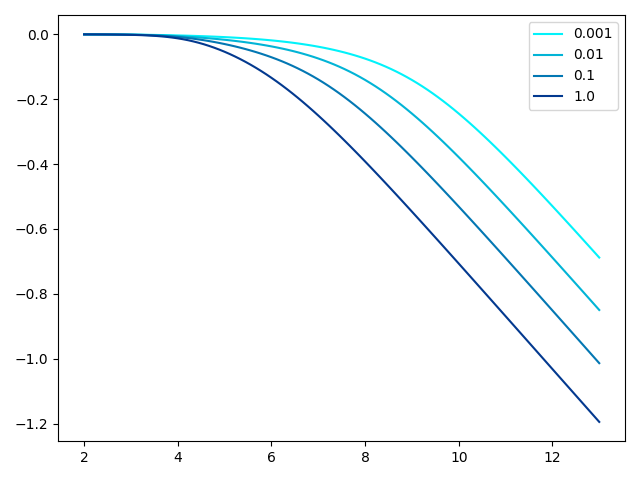

In [3]:
p_h = np.linspace(2, 13, 100)
conc_range = [1e-3, 10e-3, 100e-3, 1000e-3]
fig, ax = plt.subplots()

for i, conc in enumerate(conc_range):
    silica = edl.Aqueous(conc, 8, 8, 8, 8)
    silica_sol = silica.ph_sweep(p_h, tol=1e-2)
    
    color = plotting.get_color_gradient(len(conc_range))[i]
    ax.plot(p_h, silica_sol['efield'] * 1e-9, color=color, label=conc)
ax.legend()
plt.tight_layout()

In [4]:
def reorganization_energy(efield):
    return 1 - (1+efield**2)**(-2)

def activation_energy(efield):
    return efield + 2*reorganization_energy(efield)

Sweep from -1.00V to -2.00V. Maximum relative residual: 2.34352e-05.
Sweep from -1.00V to -1.00V. Maximum relative residual: 2.34352e-05.
Sweep from -1.00V to -2.00V. Maximum relative residual: 2.06676e-05.
Sweep from -1.00V to -1.00V. Maximum relative residual: 4.76946e-06.
Sweep from -1.00V to -2.00V. Maximum relative residual: 1.54075e-04.
Sweep from -1.00V to -1.00V. Maximum relative residual: 1.54075e-04.
Sweep from -1.00V to -2.00V. Maximum relative residual: 1.67284e-05.
Sweep from -1.00V to -1.00V. Maximum relative residual: 1.37371e-06.


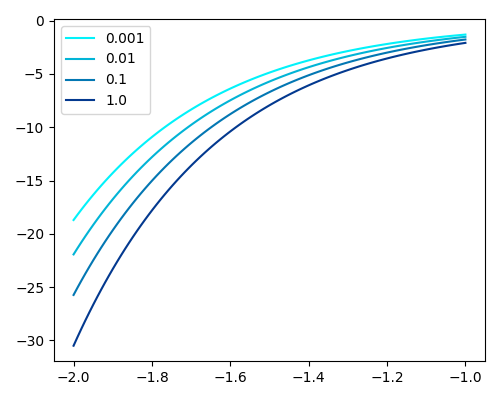

In [5]:
import plotting

conc_range = [1e-3, 10e-3, 100e-3, 1000e-3]
fig, ax = plt.subplots(figsize=(5,4))

for i, conc in enumerate(conc_range):
    potentials = np.linspace(-2, -1, 100)
    aq = edl.Aqueous(conc, 8,8,8,8)
    aq_sol = aq.potential_sweep(potentials, p_h=11)
    current = -np.exp(-activation_energy(aq_sol['efield'] * 1e-9))
    color = plotting.get_color_gradient(len(conc_range))[i]
    ax.plot(potentials, current, color=color, label=conc)
ax.legend()
plt.tight_layout()

Sweep from pH 2.00 to 10.90. Maximum relative residual: 4.69391e-06.
Sweep from -1.00V to -2.00V. Maximum relative residual: 2.34352e-05.
Sweep from -1.00V to -1.00V. Maximum relative residual: 2.34352e-05.
Sweep from pH 2.00 to 10.90. Maximum relative residual: 4.69014e-06.
Sweep from -1.00V to -2.00V. Maximum relative residual: 2.06676e-05.
Sweep from -1.00V to -1.00V. Maximum relative residual: 4.76946e-06.
Sweep from pH 2.00 to 10.90. Maximum relative residual: 4.65262e-06.
Sweep from -1.00V to -2.00V. Maximum relative residual: 1.54075e-04.
Sweep from -1.00V to -1.00V. Maximum relative residual: 1.54075e-04.
Sweep from pH 2.00 to 10.90. Maximum relative residual: 7.52357e-06.
Sweep from -1.00V to -2.00V. Maximum relative residual: 1.67284e-05.
Sweep from -1.00V to -1.00V. Maximum relative residual: 1.37371e-06.


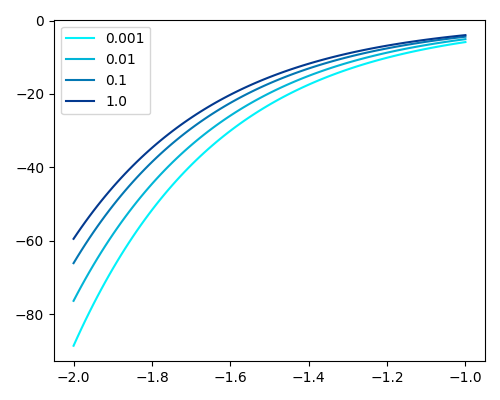

In [6]:
import plotting

conc_range = [1e-3, 10e-3, 100e-3, 1000e-3]
fig, ax = plt.subplots(figsize=(5,4))

for i, conc in enumerate(conc_range):
    potentials = np.linspace(-2, -1, 100)
    aq1 = edl.Aqueous(conc, 8,8,8,8)
    aq1_sol = aq1.insulator_spatial_profiles(p_h=11, tol=1e-2)
    efield_ins = np.ones(potentials.shape) * aq1_sol['efield'][0] * 1e-9
    aq = edl.Aqueous(conc, 8,8,8,8)
    aq_sol = aq.potential_sweep(potentials, p_h=11)
    efield_au = aq_sol['efield'] * 1e-9
    current = -np.exp(-efield_au - 2*reorganization_energy(efield_ins))
    color = plotting.get_color_gradient(len(conc_range))[i]
    # ax.plot(potentials, efield_ins, color=color, label=conc)
    # ax.plot(potentials, efield_au, '--', color=color)
    ax.plot(potentials, current, color=color, label=conc)
ax.legend()
plt.tight_layout()